In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier, plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Membuat model XGBoost
xgb_model = XGBClassifier()

# Menampilkan parameter dasar
print("\nDefault Parameters for XGBoost:")
print(xgb_model.get_xgb_params())


Default Parameters for XGBoost:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [2]:
train_set = pd.read_csv('train_norus.csv')
train_res_set = pd.read_csv('train_rus03.csv')
test_set = pd.read_csv('test_set.csv')

In [15]:
train_res_set.info()
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10972 entries, 0 to 10971
Columns: 453 entries, height to k2q31a
dtypes: float64(408), int64(45)
memory usage: 37.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43799 entries, 0 to 43798
Columns: 453 entries, height to k2q31a
dtypes: float64(408), int64(45)
memory usage: 151.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Columns: 453 entries, height to k2q31a
dtypes: float64(408), int64(45)
memory usage: 37.8 MB


In [4]:
selected_columns = ['k4q23', 'sc_cshcn', 'memorycond', 'k2q31a']

# Tampilkan beberapa baris dengan kolom terpilih
selected_data = test_set[selected_columns]

In [7]:
# Tentukan indeks awal dan akhir
start_index = len(test_set) // 2 - 5
end_index = len(test_set) // 2 + 5

# Menampilkan baris tengah dengan kolom yang diinginkan
middle_rows = test_set.iloc[start_index:end_index][selected_columns]
print(middle_rows)

      k4q23  sc_cshcn  memorycond  k2q31a
5470    2.0         2         2.0     0.0
5471    2.0         1         NaN     0.0
5472    2.0         2         2.0     0.0
5473    2.0         1         2.0     0.0
5474    2.0         2         2.0     0.0
5475    2.0         2         2.0     0.0
5476    2.0         2         NaN     0.0
5477    2.0         1         2.0     0.0
5478    2.0         2         NaN     0.0
5479    2.0         2         2.0     0.0


In [10]:
# Filter baris di mana k4q23 bernilai 1
filtered_data = test_set.loc[(test_set['k4q23'] == 1) & (test_set['sc_cshcn'] == 2), selected_columns]

# Tampilkan hasil
print(filtered_data)

       k4q23  sc_cshcn  memorycond  k2q31a
66       1.0         2         2.0     0.0
140      1.0         2         2.0     1.0
776      1.0         2         1.0     1.0
858      1.0         2         2.0     0.0
1048     1.0         2         2.0     0.0
...      ...       ...         ...     ...
9580     1.0         2         2.0     0.0
9807     1.0         2         2.0     1.0
10295    1.0         2         1.0     0.0
10438    1.0         2         2.0     0.0
10465    1.0         2         1.0     1.0

[61 rows x 4 columns]


In [5]:
selected_data

,k4q23,sc_cshcn,memorycond,k2q31a
0,2.0,2,2.0,0.0
1,2.0,1,2.0,0.0
2,2.0,2,NaN,0.0
3,2.0,2,2.0,0.0
4,2.0,2,NaN,0.0
...,...,...,...,...
10945,2.0,2,NaN,0.0
10946,2.0,2,NaN,0.0
10947,2.0,2,NaN,0.0
10948,2.0,2,2.0,0.0


In [3]:
X_train = train_set.drop(columns=['k2q31a'])
y_train = train_set['k2q31a']

X_trainrus = train_res_set.drop(columns=['k2q31a'])
y_trainrus =  train_res_set['k2q31a']

X_test = test_set.drop(columns=['k2q31a'])
y_test = test_set['k2q31a']

In [17]:
X_trainrus.shape

(10972, 452)

basic param

In [6]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_predxgb = xgb.predict(X_train)

In [7]:
xgbr = XGBClassifier(random_state=42)
xgbr.fit(X_trainrus, y_trainrus)
y_predxgbr = xgbr.predict(X_train)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Menghitung confusion matrix
cm = confusion_matrix(y_train, y_predxgb)
TN, FP, FN, TP = cm.ravel()

# Menghitung metrik
accuracy = accuracy_score(y_train, y_predxgb)
sensitivity = TP / (TP + FN)  # SE
specificity = TN / (TN + FP)  # SP

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Sensitivitas (SE):", sensitivity)
print("Spesifisitas (SP):", specificity)


Akurasi: 0.9911413502591383
Sensitivitas (SE): 0.9189907038512616
Spesifisitas (SP): 0.999439932791935


In [ ]:
# Menghitung confusion matrix
cmr = confusion_matrix(y_test, y_predxgbr)
TNr, FPr, FNr, TPr = cmr.ravel()

# Menghitung metrik
accuracyr = accuracy_score(y_test, y_predxgbr)
sensitivityr = TPr / (TPr + FNr)  # SE
specificityr = TNr / (TNr + FPr)  # SP

# Menampilkan hasil
print("Akurasi:", accuracyr)
print("Sensitivitas (SE):", sensitivityr)
print("Spesifisitas (SP):", specificityr)

Akurasi: 0.9697253361948903
Sensitivitas (SE): 0.9736609119079238
Spesifisitas (SP): 0.9692726763575266


In [ ]:
print("Classification Report\n", classification_report(y_test, y_predxgb))

In [ ]:
print("Classification Report\n", classification_report(y_test, y_predxgbr))

tuning

In [9]:
param_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [10]:
xgb = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(estimator=xgb,param_grid=param_xgb, cv=5, n_jobs=-1,verbose=2, scoring='accuracy')

In [11]:
print("Scoring method:", grid_xgb.scoring)

Scoring method: accuracy


In [ ]:
# GridSearchCV dengan multiple scoring
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring={'accuracy': 'accuracy', 'f1': 'f1'},  # Multiple metrics
    refit='accuracy',  # Model akan di-refit berdasarkan akurasi
    cv=5,
    verbose=1
)

# Data latih (X_train, y_train) - Pastikan Anda memiliki data
grid_xgb.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_xgb.best_params_)
print("Best Accuracy:", grid_xgb.cv_results_['mean_test_accuracy'][grid_xgb.best_index_])
print("Best F1-Score:", grid_xgb.cv_results_['mean_test_f1'][grid_xgb.best_index_])

In [ ]:
#no rus
xgb = XGBClassifier(random_state=42)
grid_xgb = GridSearchCV(estimator=xgb,param_grid=param_xgb, cv=5, n_jobs=-1,verbose=2, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
best_paramsxgb = grid_xgb.best_params_
print("Best Parameters:", grid_xgb.best_params_)
print("Best Score:", grid_xgb.best_score_)

In [ ]:
#rus
xgbr = XGBClassifier(random_state=42)
grid_xgbr = GridSearchCV(estimator=xgbr,param_grid=param_xgb, cv=5, n_jobs=-1,verbose=2, scoring='accuracy')
grid_xgbr.fit(X_trainrus, y_trainrus)
best_paramsxgbr = grid_xgbr.best_params_
print("Best Parameters:", grid_xgbr.best_params_)
print("Best Score:", grid_xgbr.best_score_)

In [10]:
best_paramsxgb = {
    'n_estimators': 200,
    'learning_rate':  0.1,
    'max_depth':  5,
    'subsample': 0.8,
    'colsample_bytree':  1
}
best_paramsxgbr = {
    'n_estimators': 100,
    'learning_rate':  0.1,
    'max_depth':  5,
    'subsample': 1.0,
    'colsample_bytree': 0.8
}

In [16]:
# Membuat model dengan parameter terbaik
#no rus
bestxgb = XGBClassifier(**best_paramsxgb, random_state=42)
bestxgb.fit(X_train, y_train)
y_bestpredxgb = bestxgb.predict(X_test)

In [12]:
# Membuat model dengan parameter terbaik
#rus
bestxgbr = XGBClassifier(**best_paramsxgbr, random_state=42)
bestxgbr.fit(X_trainrus, y_trainrus)
y_bestpredxgbr = bestxgbr.predict(X_test)

In [17]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_bestpredxgb)
TN, FP, FN, TP = cm.ravel()

# Menghitung metrik
accuracy = accuracy_score(y_test, y_bestpredxgb)
sensitivity = TP / (TP + FN)  # SE
specificity = TN / (TN + FP)  # SP

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Sensitivitas (SE):", sensitivity)
print("Spesifisitas (SP):", specificity)

Akurasi: 0.944931506849315
Sensitivitas (SE): 0.631858407079646
Spesifisitas (SP): 0.9809572301425662


In [14]:
# Menghitung confusion matrix
cmr = confusion_matrix(y_test, y_bestpredxgbr)
TNr, FPr, FNr, TPr = cmr.ravel()

# Menghitung metrik
accuracyr = accuracy_score(y_test, y_bestpredxgbr)
sensitivityr = TPr / (TPr + FNr)  # SE
specificityr = TNr / (TNr + FPr)  # SP

# Menampilkan hasil
print("Akurasi:", accuracyr)
print("Sensitivitas (SE):", sensitivityr)
print("Spesifisitas (SP):", specificityr)

Akurasi: 0.9347031963470319
Sensitivitas (SE): 0.7716814159292036
Spesifisitas (SP): 0.9534623217922606


In [18]:
print("Classification Report\n", classification_report(y_test, y_bestpredxgb))

Classification Report
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      9820
         1.0       0.79      0.54      0.64      1130

    accuracy                           0.94     10950
   macro avg       0.87      0.76      0.80     10950
weighted avg       0.94      0.94      0.94     10950



In [19]:
print("Classification Report\n", classification_report(y_test, y_bestpredxgbr))

Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      9820
         1.0       0.66      0.77      0.71      1130

    accuracy                           0.93     10950
   macro avg       0.81      0.86      0.84     10950
weighted avg       0.94      0.93      0.94     10950



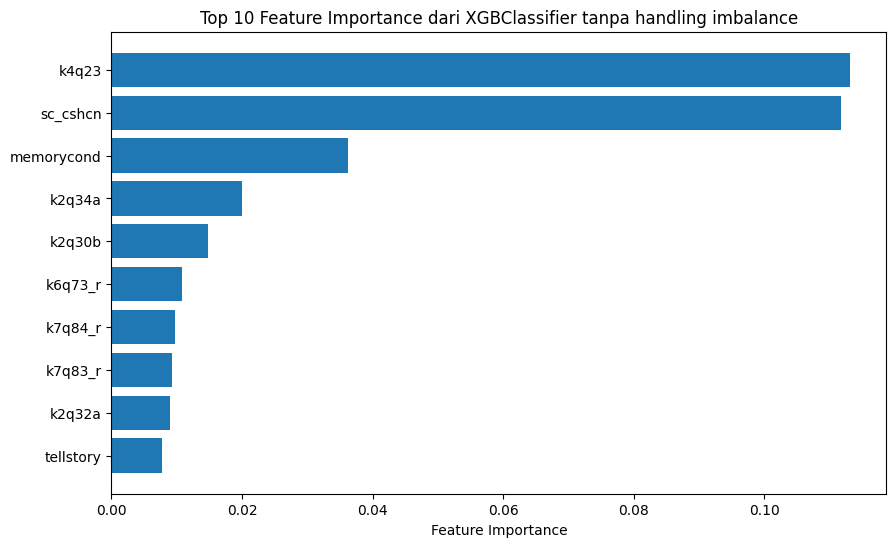

In [22]:
# Mendapatkan importance dari setiap fitur
feature_importances = bestxgb.feature_importances_

# Membuat DataFrame untuk kemudahan manipulasi
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Mengurutkan berdasarkan importance dan memilih 10 fitur teratas
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot fitur teratas
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(top_features)), top_features['Importance'], align='center')
plt.yticks(np.arange(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance dari XGBClassifier tanpa handling imbalance')
plt.gca().invert_yaxis()  # Membalik sumbu y agar fitur terpenting di atas
plt.show()